In [1]:
# Import the required Python Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Set the Working Directory
os.chdir('C:/Users/Puneet Kishore/OneDrive/Desktop/Imarticus/Python/Project - K-Nearest Neighbor')

In [3]:
# Import the Data/File from the PC
df = pd.read_csv('cancerdata.csv')

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,926682,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,926954,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,927241,M,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,...,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609


In [5]:
# Check the number of rows and columns of the dataset
df.shape

(569, 32)

In [6]:
# Check the Datatypes of the Dataset 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Check if there's any Null Value in the dataset 'df'
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### There are no Null Values, so we can move forward with the Data Visualization and see if the target variable is balanced or not.

In [8]:
# Checking the Str/Character of Numeric columns in the dataset 'df'
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,1.250206e+08,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,8.670000e+03,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,...,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,8.692180e+05,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,9.060240e+05,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,8.813129e+06,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,9.113205e+08,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


In [9]:
# Check the Unique Values of the Dependent/Target Variable 'diagnosis'
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
# Check the Value Counts of the Dependent/Target Variable 'diagnosis'
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### We can see that 63% belongs to 'B' i.e., 'Benign' and 37% belongs to 'M' i.e., 'Magninant'.

In [11]:
# Check the Correlation of the Varables in the dataset 'df'
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.042696,-0.065462,0.073159,0.096893,0.089233,-0.023657,-0.030316,0.043694,0.022677,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.014777,0.023203,-0.001329,-0.044224,-0.022066
radius_mean,0.042696,1.000000,0.070425,-0.035228,-0.032708,0.024861,0.010012,-0.074375,-0.070011,0.046623,...,-0.037750,-0.054781,-0.035869,-0.041812,0.011173,-0.063024,-0.049089,-0.000033,0.013231,-0.019669
texture_mean,-0.065462,0.070425,1.000000,0.006155,0.008631,0.021654,0.047145,0.006832,0.077424,-0.023344,...,0.008352,0.048012,0.010269,0.012803,0.033872,0.053946,0.044502,-0.049535,0.056662,-0.013935
perimeter_mean,0.073159,-0.035228,0.006155,1.000000,0.986507,-0.043853,0.000807,0.049568,-0.071642,0.002254,...,0.969476,0.303038,0.970387,0.941550,0.150549,-0.020032,0.563879,-0.039836,0.189115,-0.012852
area_mean,0.096893,-0.032708,0.008631,0.986507,1.000000,-0.047062,0.002561,0.040642,-0.060022,-0.001786,...,0.962746,0.287489,0.959120,0.959213,0.123523,-0.013764,0.512606,-0.036284,0.143570,-0.029543
smoothness_mean,0.089233,0.024861,0.021654,-0.043853,-0.047062,1.000000,-0.041543,-0.002777,0.000010,0.032645,...,-0.044234,-0.073102,-0.036288,-0.048910,-0.021490,0.044842,0.016772,0.065017,-0.038502,-0.029748
compactness_mean,-0.023657,0.010012,0.047145,0.000807,0.002561,-0.041543,1.000000,-0.002953,0.019169,-0.058799,...,0.003426,0.048005,0.003217,0.009143,0.040886,-0.035002,-0.015305,0.052424,0.000749,-0.001925
concavity_mean,-0.030316,-0.074375,0.006832,0.049568,0.040642,-0.002777,-0.002953,1.000000,0.042943,0.039856,...,0.019058,-0.052707,0.028040,0.009482,0.039363,-0.021552,0.077975,-0.074706,0.037577,-0.000306
concave points_mean,0.043694,-0.070011,0.077424,-0.071642,-0.060022,0.000010,0.019169,0.042943,1.000000,-0.015877,...,-0.062171,-0.026923,-0.065773,-0.047116,-0.002481,-0.007732,-0.041824,0.011258,-0.046071,0.063022
symmetry_mean,0.022677,0.046623,-0.023344,0.002254,-0.001786,0.032645,-0.058799,0.039856,-0.015877,1.000000,...,-0.003456,-0.040158,-0.004209,-0.005463,0.013762,-0.030260,-0.011905,0.002119,0.033243,0.029987


<AxesSubplot:>

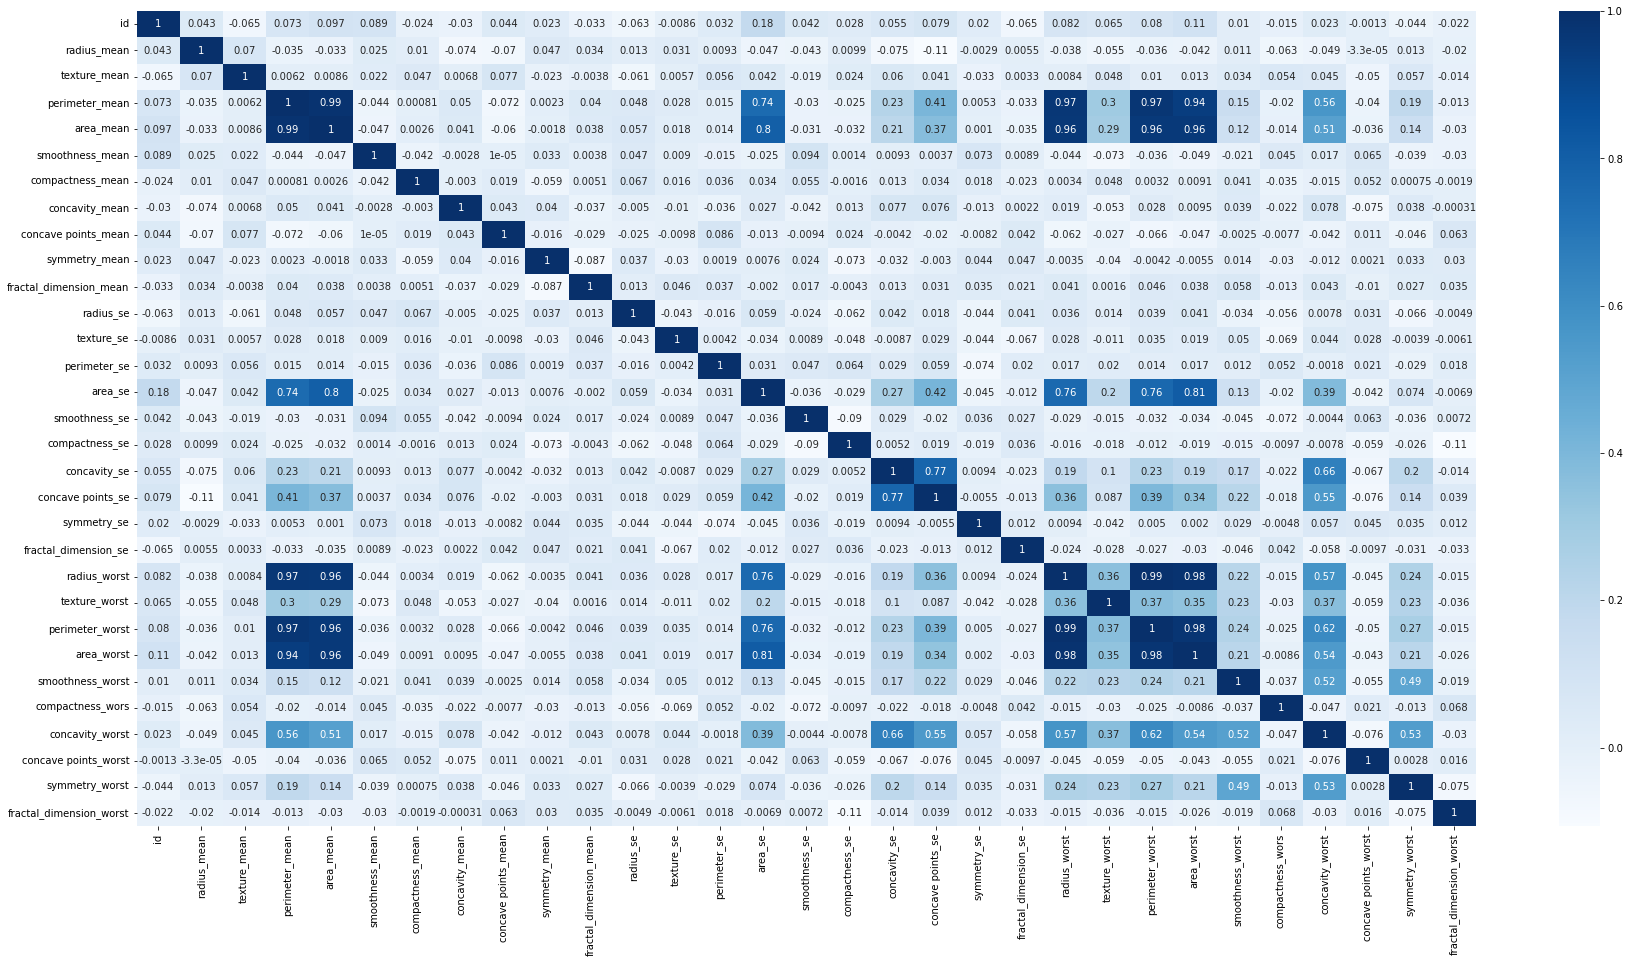

In [12]:
# Visualize the Correlation with the Heatmap
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [13]:
# Drop 'id' column from the dataset 'df'
df = df.drop('id', axis = 1)

In [14]:
# Check the dataset after removing 'id' column
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594
1,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397
2,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802
3,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210
4,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,0.157627,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,0.208220,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,0.211039,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,M,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,0.151310,...,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609


In [15]:
# Check the names of the clumns in the dataset 'df'
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [16]:
# Label Encoding on 'diagnosis' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [17]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [18]:
# Check the Value Counts of the Dependent/Target Variable 'diagnosis' after Label Encoding
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### 'Benign' has been convereted to '0', whereas 'Magninant' has been converted to '1' after performing Label Encoding on the column.

C:\Users\Puneet Kishore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

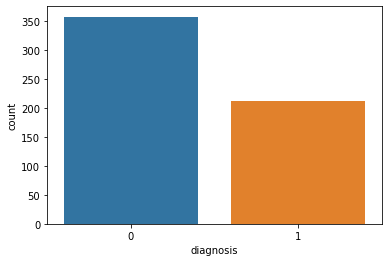

In [19]:
# Visualize the Value Counts of the Dependent/Target Variable 'diagnosis' through Countplot
sns.countplot(df['diagnosis'])

In [20]:
# Segregate the Dependent and Independent Variables from the dataset 'df'
x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [21]:
# Independent Variables
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,...,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594
1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,...,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397
2,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,...,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802
3,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,...,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210
4,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,...,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,0.157627,0.061794,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,0.208220,0.073724,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,0.211039,0.061090,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,0.151310,0.066581,...,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609


In [22]:
# Dependent Variable
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [23]:
# Perform Train and Test Split of the Segregated Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [24]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,13.870706,19.541270,64.41,310.8,0.095066,0.143390,-0.064287,0.015055,0.150048,0.063041,...,11.160,26.84,71.98,384.0,0.14020,0.228874,0.1055,0.022767,0.2894,0.081966
427,10.457178,17.641199,68.79,359.9,0.103704,0.043663,0.166668,0.064963,0.195278,0.060413,...,12.760,32.04,83.69,489.5,0.13030,0.238419,0.1927,0.093209,0.2965,0.065336
406,17.393131,15.805025,104.30,800.0,0.108856,0.065614,0.163425,0.078098,0.179416,0.056693,...,17.710,19.58,115.90,947.9,0.12060,-0.146164,0.2310,0.239163,0.2778,0.063857
96,16.041650,18.877867,77.79,451.1,0.128182,0.010408,0.157710,-0.007168,0.201321,0.062841,...,12.830,20.92,82.14,495.2,0.11400,0.564675,0.0498,0.212252,0.2227,0.117961
490,10.621675,25.259429,78.18,466.5,0.108655,0.020065,0.142446,0.084265,0.168305,0.058484,...,14.170,31.99,92.74,622.9,0.12560,0.297597,0.1230,0.069052,0.3100,0.063438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,14.424108,17.493847,120.90,1102.0,0.089821,0.068259,0.184937,0.068666,0.153945,0.058696,...,19.960,24.30,129.00,1236.0,0.12430,0.242883,0.2210,0.100345,0.2567,0.063192
9,15.150892,18.319345,83.97,475.9,0.110456,0.012679,0.028059,-0.001305,0.194958,0.077700,...,15.090,40.68,97.65,711.4,0.18530,0.241266,1.1050,0.197198,0.4366,0.072885
359,14.616444,14.840297,59.82,278.6,0.119089,0.164866,0.197618,0.025255,0.210791,0.062127,...,12.020,25.02,75.79,439.6,0.13330,0.498816,0.1144,0.105542,0.2454,0.059273
192,14.908504,13.099802,60.73,288.1,0.094016,0.073735,0.152872,0.091394,0.191005,0.063102,...,9.968,20.83,62.25,303.8,0.07117,0.236396,0.0000,0.113529,0.1909,0.092868


In [25]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,12.890420,12.237692,88.64,556.7,0.080122,0.158208,0.202528,0.023077,0.132922,0.070257,...,16.41,29.66,113.30,844.4,0.15740,0.294200,0.51060,0.137562,0.3585,0.063556
457,11.884368,24.999940,84.10,537.9,0.086180,0.037124,0.079869,0.053901,0.155214,0.068306,...,14.35,34.23,91.29,632.9,0.12890,0.325309,0.13900,0.110480,0.2444,0.061160
439,11.266940,12.402580,89.59,606.5,0.081719,0.114525,0.065466,0.045604,0.165674,0.067436,...,14.91,19.31,96.53,688.9,0.10340,0.018981,0.06260,0.129142,0.2136,0.087917
298,13.155962,18.592524,91.22,633.1,0.091432,0.031642,-0.036136,0.082622,0.162325,0.064069,...,16.22,25.26,105.80,819.7,0.09445,0.200301,0.15650,0.182621,0.2636,0.098932
37,13.327318,11.165145,82.61,523.8,0.085342,0.089397,0.084382,0.085479,0.162958,0.064387,...,13.30,22.81,84.46,545.9,0.09701,0.125138,0.04833,0.255697,0.1987,0.071683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,10.148152,18.113551,114.50,948.0,0.096414,0.054636,0.188609,0.072756,0.195136,0.061238,...,18.07,28.07,120.40,1021.0,0.12430,0.060291,0.28030,0.094117,0.1603,0.082595
519,16.782679,21.663764,82.51,493.8,0.088012,0.137830,0.080338,0.039912,0.186310,0.066382,...,14.45,21.74,93.63,624.1,0.14750,0.313505,0.14230,0.138263,0.3071,0.079060
432,10.980987,24.225829,133.80,1250.0,0.082092,0.097027,0.157938,0.010280,0.203820,0.056653,...,22.03,25.07,146.00,1479.0,0.16650,0.433938,0.53080,0.136903,0.3032,0.058468
516,12.631849,14.338209,120.80,1052.0,0.088194,0.052264,0.104887,0.044228,0.178786,0.055400,...,21.86,26.20,142.20,1493.0,0.14920,0.432499,0.37590,0.097804,0.3074,0.081251


In [26]:
y_train

338    0
427    0
406    0
96     0
490    0
      ..
277    1
9      1
359    0
192    0
559    0
Name: diagnosis, Length: 455, dtype: int32

In [27]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: int32

In [28]:
# Standard Scaling the Independent Variables of both Train and Test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [30]:
# Build K-Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)

In [31]:
knn.fit(x_train_sc, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
pred = knn.predict(x_test_sc)

In [33]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [34]:
# Evaluate the Model through Accuracy, Classification Report and Confusion Matrix
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy Score:', accuracy_score(y_test, pred))

Accuracy Score: 0.9385964912280702


In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        67
           1       1.00      0.85      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [36]:
# Find the best value for 'K'
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_sc,y_train)
    pred_new = knn.predict(x_test_sc)
    error.append(np.mean(pred_new !=y_test))

Text(0, 0.5, 'error')

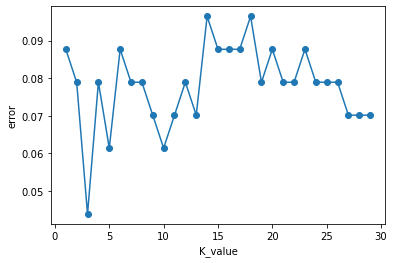

In [37]:
plt.plot(range(1,30), error, marker='o')
plt.xlabel('K_value')
plt.ylabel('error')

In [38]:
error

[0.08771929824561403,
 0.07894736842105263,
 0.043859649122807015,
 0.07894736842105263,
 0.06140350877192982,
 0.08771929824561403,
 0.07894736842105263,
 0.07894736842105263,
 0.07017543859649122,
 0.06140350877192982,
 0.07017543859649122,
 0.07894736842105263,
 0.07017543859649122,
 0.09649122807017543,
 0.08771929824561403,
 0.08771929824561403,
 0.08771929824561403,
 0.09649122807017543,
 0.07894736842105263,
 0.08771929824561403,
 0.07894736842105263,
 0.07894736842105263,
 0.08771929824561403,
 0.07894736842105263,
 0.07894736842105263,
 0.07894736842105263,
 0.07017543859649122,
 0.07017543859649122,
 0.07017543859649122]

In [39]:
# Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        67
           1       1.00      0.85      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [41]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[67,  0],
       [ 7, 40]], dtype=int64)

### Type-II error has been reduced to 0 and Type-I error is 7.